# K-Means Clustering

- K-Means is the most popular clustering algorithm. 
- It uses an iterative technique to group unlabeled data into K clusters based on cluster centers (centroids). 
- The data in each cluster are chosen such that their average distance to their respective centroid is minimized.
1. Randomly place K centroids for the initial clusters.
2. Assign each data point to their nearest centroid.
3. Update centroid locations based on the locations of the data points.
4. Repeat Steps 2 and 3 until points don’t move between clusters and centroids stabilize.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\income.csv")

In [18]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [19]:
df.shape

(22, 3)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [21]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [22]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90704.545455
std,5.901060,43953.075382
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [23]:
df.drop("Name", axis = 1, inplace = True)

In [24]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


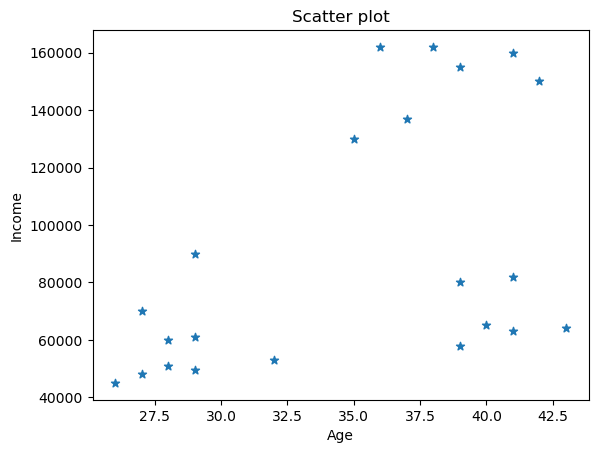

In [25]:
plt.scatter(df['Age'], df['Income'], marker = '*')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot')
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [27]:
model = KMeans(n_clusters=3)

In [28]:
model.fit(df[['Age', 'Income']])

KMeans(n_clusters=3)

In [29]:
model.predict(df[['Age', 'Income']])

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [30]:
df['clusters'] = model.predict(df[['Age', 'Income']])

In [31]:
df.head()

,Age,Income,clusters
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [32]:
df0 = df[df['clusters'] == 0]
df1 = df[df['clusters'] == 1]
df2 = df[df['clusters'] == 2]

In [33]:
df0

,Age,Income,clusters
0,27,70000,0
1,29,90000,0
19,39,80000,0
20,41,82000,0


In [34]:
df1

,Age,Income,clusters
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,162000,1
9,35,130000,1
10,37,137000,1


In [35]:
df2

,Age,Income,clusters
2,29,61000,2
3,28,60000,2
11,26,45000,2
12,27,48000,2
13,28,51000,2
14,29,49500,2
15,32,53000,2
16,40,65000,2
17,41,63000,2
18,43,64000,2


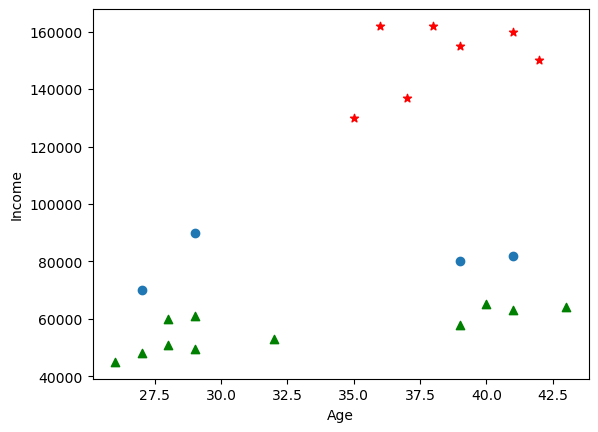

In [38]:
plt.scatter(df0['Age'], df0['Income'])
plt.scatter(df1['Age'], df1['Income'], color = 'r', marker = '*')
plt.scatter(df2['Age'], df2['Income'], color = 'g', marker = '^')
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
df['Age'] = scaler.fit_transform(df[["Age"]])

In [42]:
df['Income'] = scaler.fit_transform(df[["Income"]])

In [43]:
df

,Age,Income,clusters
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,1.000000,1
9,0.529412,0.726496,1


In [44]:
model.fit(df[['Age', 'Income']])

KMeans(n_clusters=3)

In [45]:
predicted = model.predict(df[['Age', 'Income']])

In [46]:
df['clusters']  = predicted

In [47]:
df

,Age,Income,clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,1.000000,2
9,0.529412,0.726496,2


In [48]:
df0 = df[df['clusters'] == 0]
df1 = df[df['clusters'] == 1]
df2 = df[df['clusters'] == 2]

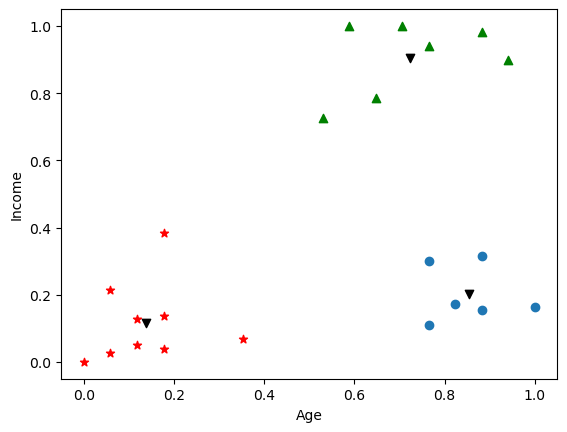

In [49]:
plt.scatter(df0['Age'], df0['Income'])
plt.scatter(df1['Age'], df1['Income'], color = 'r', marker = '*')
plt.scatter(df2['Age'], df2['Income'], color = 'g', marker = '^')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = 'black', marker = 'v')
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

In [50]:
model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.9047619 ]])

In [51]:
model.cluster_centers_[:,0]

array([0.85294118, 0.1372549 , 0.72268908])

In [52]:
model.cluster_centers_[:,1]

array([0.2022792 , 0.11633428, 0.9047619 ])

# Inertia

- The Inertia or within cluster of sum of squares value gives an indication of how coherent the different clusters are.

- It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [53]:
model.inertia_

0.48259220352300947

In [54]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age",'Income']])
    sse.append(km.inertia_)

C:\Users\praja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
sse

[5.493999956592009,
 2.1317304647961124,
 0.48259220352300947,
 0.37035131691427603,
 0.28342588370684085,
 0.22330578121250355,
 0.16887732778070813,
 0.13294640369286218,
 0.10498404982220384]

- To find the optimal K for a dataset, use the Elbow method; 
- find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph

Text(0, 0.5, 'sse')

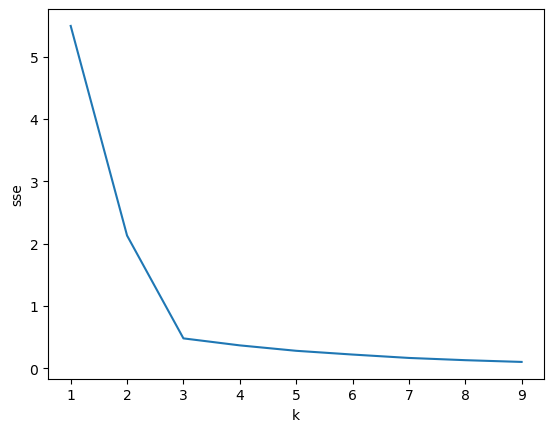

In [56]:
plt.plot(k_range,sse)
plt.xlabel("k")
plt.ylabel('sse')

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

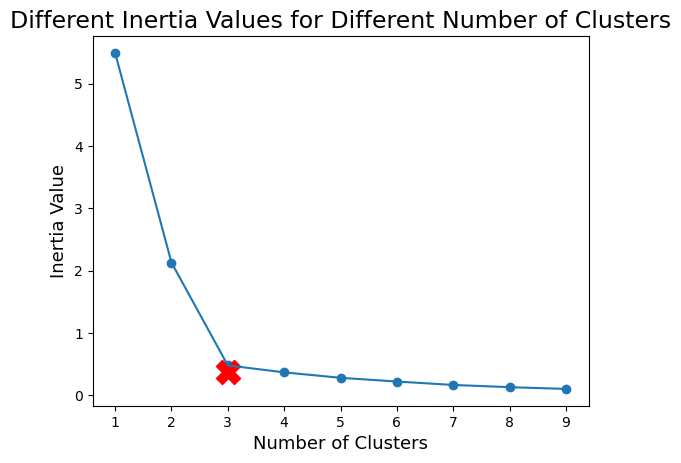

In [57]:
# plot the inertia curve
plt.plot(k_range, sse)
plt.scatter(k_range, sse)
plt.scatter(3, sse[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

- The red x-marker marks the elbow point. 
- The elbow point gives the optimal number of clusters, which is three here